# PySpark
pyspark is a python api for working with apache spark. I will first explain what do I mean by a "python api" for something and then explain what, specifically, is 'apache spark'.

what I mean by **'python api'** is that you can use the syntex and agility of python to interact with and send commands to a system that is not based, at its core, on python.

with pyspark, you intercat with apache spark - a system designed for working, analyzing and modeling with immense amounts of data in many computers at the same time. putting it in a different way, apache spark allows you to run computations in parallel, instead of sequentially. it allows you to divide one incredibly large task into many smaller tasks, and run each such task on a different machine.this allowes you to accomplish your analysis goals in reasonable time that would not be possible on a single machine.

usually, we would define the amount of data that suits PySpark as what would not fit into a single machine storage (let alone RAM).

**important related concepts:**
 - distributed computing - when you distribute a task into several smaller task that run at the same time. this is what pyspark allows you to do with many machines, but it can also be done on a single machine with several threads, for example.
 -Ccluster - a network of machines that can take on tasks from a user, interact with one another and return results. these provide the computing resources that pyspark will use to make the computations.
 - Resilient Distributed Dataset (RDD) - an immutable distributed collection of data. it is not tabular, like DataFrames which we will work with later, and has no data schema. therefore, for tabular data wrangling, DataFrames allowes for more API options and uner-then-hood optimizations. still, you might encounter RDDs as you learn more about Spark, and should be aware of their existence.

**Part of PySpark we will cover:**
 - PySpark SQL - contains commands for data processing and manipulation.
 - PySpark ML - includes a variety of models, model training and related commands.

**Spark Architecture:** 

To send commands and receive results from a cluster, you will need to initiate a spark session. this object is your tool for interacting with Spark. each user of the cluster will have its own Spark Session, that will allow him to use the cluster in isolation from other users. all of the sessions are communicating with a spark context, which is the master node in the cluster - that is, it assigns each of computers in the cluster tasks and coordinates them. each of the computers in the cluster that perform tasks for a master node is called a worker node. to connect to a worker node, the master node needs to get that node's comput power allocated to it, by a cluster manager, that is responsable for distributing the cluster resources. inside each worker node, there are execute programs that run the tasks - they can run multiple tasks simultaneously, and has their own cashe for storing results. so, each master node can have multiple worker nodes, that can have multiple tasks running.

## Setup

In [1]:
# Python api for Apache Spark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=7643268472911d845d522d8eb453160d923f1cca059fea1982b623a0922d6b0d
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [2]:
# Create a spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('test-session').getOrCreate()
spark

## Create a dataframe

In [13]:
df2 = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30], 
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])

df2.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



In [14]:
# Group by clolor and apply avg() to the reslt
df2.groupby('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
| blue|    3.0|   30.0|
|black|    6.0|   60.0|
+-----+-------+-------+



In [15]:
# Group & count
df2.groupby('fruit').count().show()
df2.groupby(['fruit', 'color']).count().sort('fruit').show()

+------+-----+
| fruit|count|
+------+-----+
| grape|    2|
|banana|    3|
|carrot|    3|
+------+-----+

+------+-----+-----+
| fruit|color|count|
+------+-----+-----+
|banana| blue|    1|
|banana|  red|    2|
|carrot|  red|    2|
|carrot|black|    1|
| grape| blue|    1|
| grape|  red|    1|
+------+-----+-----+



## Spark SQL
- Used-car dataset "ford.csv" from kaggle.com

In [38]:
# load the ford dataset as 
ford = spark.read.csv('ford.csv', inferSchema=True, header=True)
type(ford)

pyspark.sql.dataframe.DataFrame

In [39]:
ford.show(3)

+-------+----+-----+------------+-------+--------+---+----+----------+
|  model|year|price|transmission|mileage|fuelType|tax| mpg|engineSize|
+-------+----+-----+------------+-------+--------+---+----+----------+
| Fiesta|2017|12000|   Automatic|  15944|  Petrol|150|57.7|       1.0|
|  Focus|2018|14000|      Manual|   9083|  Petrol|150|57.7|       1.0|
|  Focus|2017|13000|      Manual|  12456|  Petrol|150|57.7|       1.0|
+-------+----+-----+------------+-------+--------+---+----+----------+
only showing top 3 rows



In [40]:
ford.describe().show()

+-------+----------------+------------------+------------------+------------+------------------+--------+------------------+-----------------+------------------+
|summary|           model|              year|             price|transmission|           mileage|fuelType|               tax|              mpg|        engineSize|
+-------+----------------+------------------+------------------+------------+------------------+--------+------------------+-----------------+------------------+
|  count|           17965|             17965|             17965|       17965|             17965|   17965|             17965|            17965|             17965|
|   mean|            null|2016.8665738936822|12279.756415251879|        null|23363.630503757307|    null|113.33453938213192|57.90699137211279| 1.350826607291959|
| stddev|            null| 2.050345752150977| 4741.382605929791|        null|19472.114689574093|    null| 62.01043819764431|10.12597742046986|0.4323713839187368|
|    min|           B-MAX|  

In [41]:
ford.printSchema()

root
 |-- model: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- mileage: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- tax: integer (nullable = true)
 |-- mpg: double (nullable = true)
 |-- engineSize: double (nullable = true)



In [42]:
ford.groupby('model').count().show()

+--------------------+-----+
|               model|count|
+--------------------+-----+
|     Transit Tourneo|    1|
|              Ranger|    1|
|                Puma|   80|
|                Kuga| 2225|
|            Streetka|    2|
|               Focus| 4588|
|         Grand C-MAX|  247|
|             Mustang|   57|
|      Tourneo Custom|   69|
|     Tourneo Connect|   33|
|              Fiesta| 6557|
|              Fusion|   16|
|              Galaxy|  228|
| Grand Tourneo Co...|   59|
|              Mondeo|  526|
|                 Ka+|  531|
|              Escort|    1|
|            EcoSport| 1143|
|               S-MAX|  296|
|                  KA|  199|
+--------------------+-----+
only showing top 20 rows



## Spark ML
 - Heart dataset from kaggle: https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [6]:
df = spark.read.csv('heart.csv', inferSchema=True, header=True)
df.show(5)

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
+---+---+-------------+---------+-----------+---------+-

In [7]:
# number of rows
df.count()

918

In [8]:
# show selected parts of the table
df.select('Age').show(3)
df.select(['Age', 'Sex', 'Cholesterol']).show(3)

+---+
|Age|
+---+
| 40|
| 49|
| 37|
+---+
only showing top 3 rows

+---+---+-----------+
|Age|Sex|Cholesterol|
+---+---+-----------+
| 40|  M|        289|
| 49|  F|        180|
| 37|  M|        283|
+---+---+-----------+
only showing top 3 rows



### Linear Regression

In [9]:
# Build a Linear regression model
X_column_names = ['Age','Cholesterol']
target_colum_name = ['MaxHR']

# convert feature columns into a columns where the vlues are feature vectors
from pyspark.ml.feature import VectorAssembler
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='Fvec')
df = v_asmblr.transform(df)
X = df.select(['Age','Cholesterol','Fvec','MaxHR'])
X.show(3)

+---+-----------+------------+-----+
|Age|Cholesterol|        Fvec|MaxHR|
+---+-----------+------------+-----+
| 40|        289|[40.0,289.0]|  172|
| 49|        180|[49.0,180.0]|  156|
| 37|        283|[37.0,283.0]|   98|
+---+-----------+------------+-----+
only showing top 3 rows



In [10]:
# devide dataset into training and testing sets
trainset, testset = X.randomSplit([0.8,0.2])

# predict 'RestingBP' using linear regression
from pyspark.ml.regression import LinearRegression
model = LinearRegression(featuresCol='Fvec', labelCol='MaxHR')
model = model.fit(trainset)
print(model.coefficients)
print(model.intercept)

[-1.0329380291355208,0.04331747274261589]
183.48605434411587


In [11]:
# evaluate model
model.evaluate(testset).predictions.show(3)

+---+-----------+------------+-----+------------------+
|Age|Cholesterol|        Fvec|MaxHR|        prediction|
+---+-----------+------------+-----+------------------+
| 29|        243|[29.0,243.0]|  160|164.05699737564143|
| 29|        263|[29.0,263.0]|  170|164.92334683049376|
| 30|        237|[30.0,237.0]|  170|162.76415451005022|
+---+-----------+------------+-----+------------------+
only showing top 3 rows



In [12]:
# handle categorical features with ordinal indexing
from pyspark.ml.feature import StringIndexer
indxr = StringIndexer(inputCol='ChestPainType', outputCol='ChestPainTypeInxed')
indxr.fit(df).transform(df).select('ChestPainTypeInxed').show(3)

+------------------+
|ChestPainTypeInxed|
+------------------+
|               2.0|
|               1.0|
|               2.0|
+------------------+
only showing top 3 rows



### Logistic Regression

In [22]:
# Build a classifier with logistic regression
X_column_names = ['Age','Cholesterol', 'RestingBP', 'MaxHR']
target_colum_name = ['HeatDisease']

# convert feature columns into a columns where the vlues are feature vectors
from pyspark.ml.feature import VectorAssembler
v_asmblr = VectorAssembler(inputCols=X_column_names, outputCol='Fvec2')
df = v_asmblr.transform(df)
X = df.select(['Age','Cholesterol', 'RestingBP', 'MaxHR', 'Fvec2','HeartDisease'])
X.show(3)

+---+-----------+---------+-----+--------------------+------------+
|Age|Cholesterol|RestingBP|MaxHR|               Fvec2|HeartDisease|
+---+-----------+---------+-----+--------------------+------------+
| 40|        289|      140|  172|[40.0,289.0,140.0...|           0|
| 49|        180|      160|  156|[49.0,180.0,160.0...|           1|
| 37|        283|      130|   98|[37.0,283.0,130.0...|           0|
+---+-----------+---------+-----+--------------------+------------+
only showing top 3 rows



In [53]:
# devide dataset into training and testing sets
trainset, testset = X.randomSplit([0.8,0.2])

# predict 'HeartDisease' using logistic regression
from pyspark.ml.classification import LogisticRegression
model = LogisticRegression(featuresCol='Fvec2', labelCol='HeartDisease')
model = model.fit(trainset)
model.coefficients

DenseVector([0.0344, -0.0042, 0.0109, -0.0281])

In [54]:
# evaluate model
model.evaluate(testset).predictions.show(10)

+---+-----------+---------+-----+--------------------+------------+--------------------+--------------------+----------+
|Age|Cholesterol|RestingBP|MaxHR|               Fvec2|HeartDisease|       rawPrediction|         probability|prediction|
+---+-----------+---------+-----+--------------------+------------+--------------------+--------------------+----------+
| 31|        219|      100|  150|[31.0,219.0,100.0...|           0|[1.27313547938931...|[0.78127901778001...|       0.0|
| 32|        198|      105|  165|[32.0,198.0,105.0...|           0|[1.51726717312835...|[0.82013570537552...|       0.0|
| 34|        161|      130|  190|[34.0,161.0,130.0...|           0|[1.72252470124163...|[0.84845374805806...|       0.0|
| 35|        161|      123|  153|[35.0,161.0,123.0...|           0|[0.72510647587420...|[0.67373050517046...|       0.0|
| 36|        160|      150|  172|[36.0,160.0,150.0...|           0|[0.92576998956454...|[0.71621632063329...|       0.0|
| 37|        173|      130|  184

In [55]:
# summarize predictions
model.evaluate(testset).predictions.describe(['HeartDisease', 'prediction']).show()

+-------+------------------+-------------------+
|summary|      HeartDisease|         prediction|
+-------+------------------+-------------------+
|  count|               172|                172|
|   mean|0.5523255813953488| 0.6046511627906976|
| stddev|0.4987063367713683|0.49035301205497706|
|    min|                 0|                0.0|
|    max|                 1|                1.0|
+-------+------------------+-------------------+



In [56]:
pred = model.transform(testset)

In [57]:
pred.show(3)

+---+-----------+---------+-----+--------------------+------------+--------------------+--------------------+----------+
|Age|Cholesterol|RestingBP|MaxHR|               Fvec2|HeartDisease|       rawPrediction|         probability|prediction|
+---+-----------+---------+-----+--------------------+------------+--------------------+--------------------+----------+
| 31|        219|      100|  150|[31.0,219.0,100.0...|           0|[1.27313547938931...|[0.78127901778001...|       0.0|
| 32|        198|      105|  165|[32.0,198.0,105.0...|           0|[1.51726717312835...|[0.82013570537552...|       0.0|
| 34|        161|      130|  190|[34.0,161.0,130.0...|           0|[1.72252470124163...|[0.84845374805806...|       0.0|
+---+-----------+---------+-----+--------------------+------------+--------------------+--------------------+----------+
only showing top 3 rows



## ML Pipeline

In [4]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

In [5]:
sc=spark.sparkContext
sqlContext=SQLContext(sc)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [6]:
df=spark.read \
 .option("header","True")\
 .option("inferSchema","True")\
 .option("sep",",")\
 .csv("diabetes.csv")
print("There are",df.count(),"rows",len(df.columns),
      "columns" ,"in the data.") 

There are 768 rows 9 columns in the data.


In [8]:
df.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [9]:
# data types
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [21]:
# data statistics
df.describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pregnancies,768,3.8450520833333335,3.36957806269887,0,17
Glucose,768,120.89453125,31.97261819513622,0,199
BloodPressure,768,69.10546875,19.355807170644777,0,122
SkinThickness,768,20.536458333333332,15.952217567727642,0,99
Insulin,768,79.79947916666667,115.24400235133803,0,846
BMI,768,31.992578124999977,7.884160320375441,0.0,67.1
DiabetesPedigreeFunction,768,0.4718763020833327,0.331328595012775,0.078,2.42
Age,768,33.240885416666664,11.760231540678689,21,81
Outcome,768,0.3489583333333333,0.476951377242799,0,1


In [22]:
# distribution of target
df.groupby('Outcome').count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



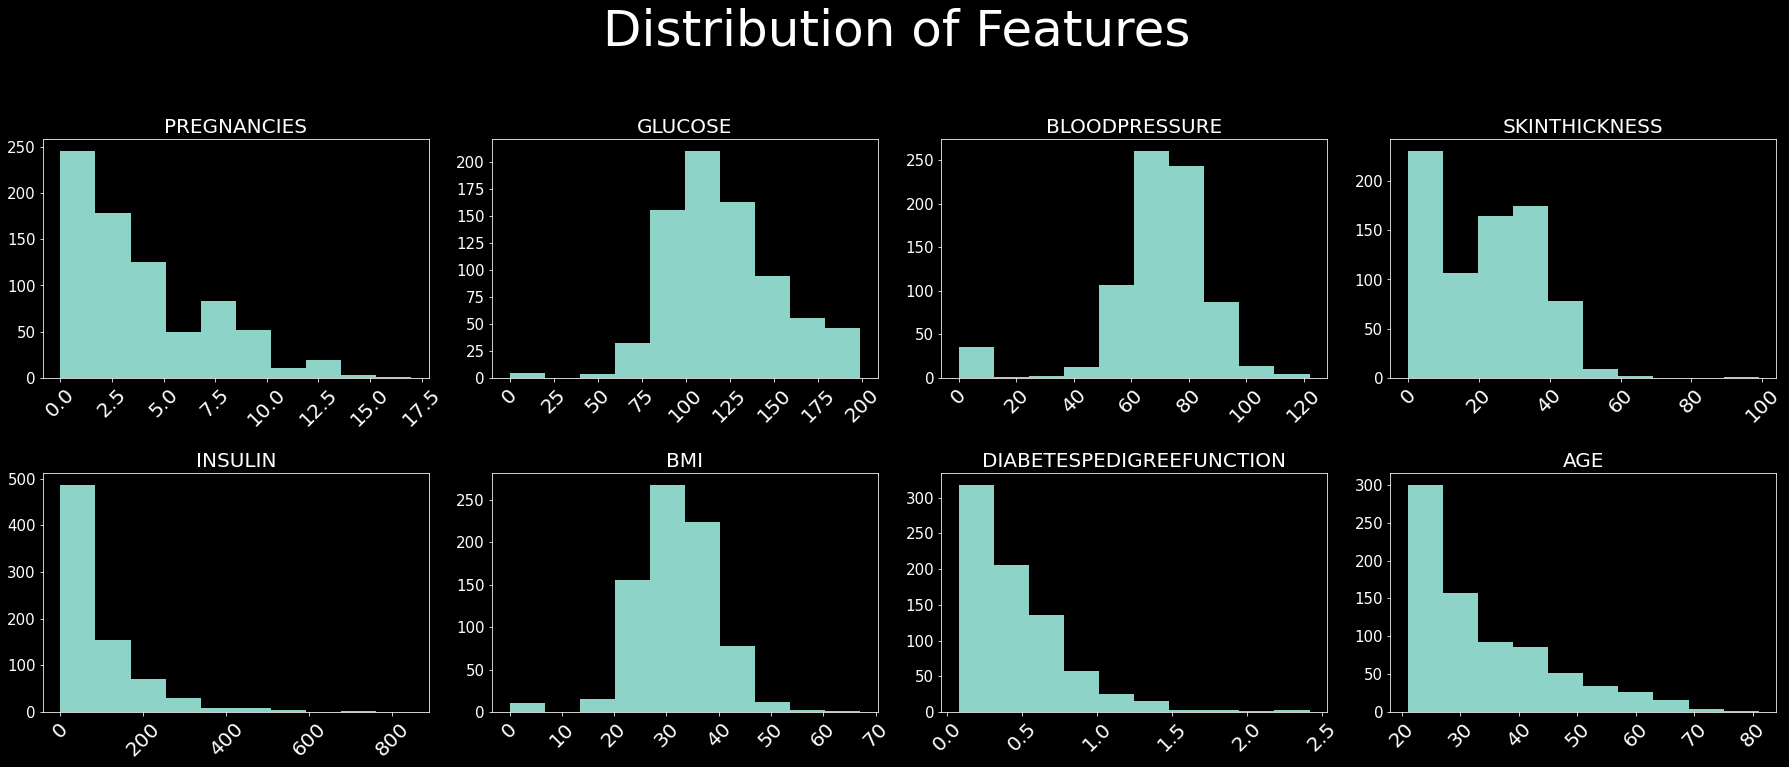

In [25]:
# distribution of features
from matplotlib import cm
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(df.drop('Outcome').toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df.toPandas()[col])
    plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

In [26]:
# check for null values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0


In [27]:
# change column name and data for target (Outcome)
from pyspark.sql.functions import udf
y_udf = udf(lambda y: "No" if y==0 else "yes", StringType())

df=df.withColumn("HasDiabities", y_udf('OutCome')).drop("OutCome")

In [28]:
# Add a new column - Age groups
def udf_multiple(age):
      if (age <= 25):
        return 'Under 25'
      elif (age >= 25 and age <= 35):
        return 'Between 25 and 35'
      elif (age > 35 and age < 50):
        return 'Between 36 and 49'
      elif (age >= 50):
        return 'Over 50'
      else: return 'N/A'

education_udf = udf(udf_multiple)
df=df.withColumn("Age_udf", education_udf('Age'))

In [29]:
# distribution of age groups
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
tab = df.select(['Age_udf','Glucose']).\
   groupBy('Age_udf').\
       agg(F.count('Glucose').alias('UserCount'),
           F.mean('Glucose').alias('Glucose_AVG'),
           F.min('Glucose').alias('Glucose_MIN'),
           F.max('Glucose').alias('Glucose_MAX')).\
       withColumn('total',sum(col('UserCount')).over(window)).\
       withColumn('Percent',col('UserCount')*100/col('total')).\
       drop(col('total')).sort(desc("Percent"))

In [30]:
tab.show()

+-----------------+---------+------------------+-----------+-----------+------------------+
|          Age_udf|UserCount|       Glucose_AVG|Glucose_MIN|Glucose_MAX|           Percent|
+-----------------+---------+------------------+-----------+-----------+------------------+
|         Under 25|      267|110.71910112359551|          0|        199|         34.765625|
|Between 25 and 35|      231|121.67099567099567|         71|        198|         30.078125|
|Between 36 and 49|      181|125.74033149171271|          0|        197|23.567708333333332|
|          Over 50|       89| 139.5505617977528|         57|        197|11.588541666666666|
+-----------------+---------+------------------+-----------+-----------+------------------+



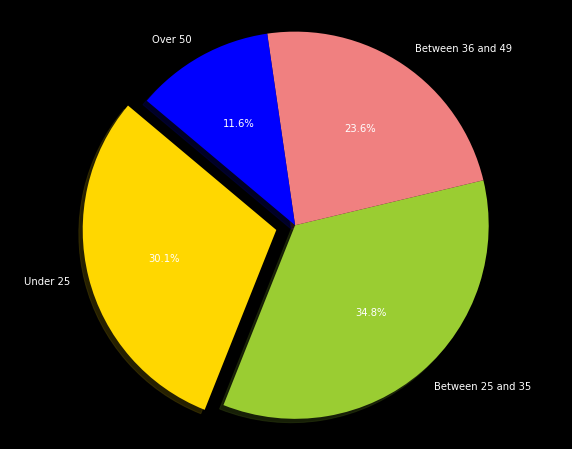

In [31]:
# Data to plot
labels = list(tab.select('Age_udf').distinct().toPandas()['Age_udf'])
sizes =  list(tab.select('Percent').distinct().toPandas()['Percent'])
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0.1, 0.0, 0 ,0.0 )  # explode 1st slice

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [32]:
# Pearson correlation
numeric_features = [t[0] for t in df.dtypes if t[1] != 'string']
numeric_features_df=df.select(numeric_features)
numeric_features_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
col_names =numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

corr_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [36]:
df = df.drop('Age')
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+------------+-----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|HasDiabities|          Age_udf|
+-----------+-------+-------------+-------------+-------+----+------------------------+------------+-----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627|         yes|          Over 50|
|          1|     85|           66|           29|      0|26.6|                   0.351|          No|Between 25 and 35|
|          8|    183|           64|            0|      0|23.3|                   0.672|         yes|Between 25 and 35|
|          1|     89|           66|           23|     94|28.1|                   0.167|          No|         Under 25|
|          0|    137|           40|           35|    168|43.1|                   2.288|         yes|Between 25 and 35|
|          5|    116|           74|            0

In [38]:
# prepare data for ML
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler

In [39]:
df2=df
df3=df

stringIndexer = StringIndexer()\
                 .setInputCol ("Age_udf")\
                 .setOutputCol ("Age_udfIndex")

Age_udfIndex_model=stringIndexer.fit(df2)
Age_udfIndex_df=Age_udfIndex_model.transform(df2)
Age_udfIndex_df.toPandas().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HasDiabities,Age_udf,Age_udfIndex
0,6,148,72,35,0,33.6,0.627,yes,Over 50,3.0
1,1,85,66,29,0,26.6,0.351,No,Between 25 and 35,1.0
2,8,183,64,0,0,23.3,0.672,yes,Between 25 and 35,1.0
3,1,89,66,23,94,28.1,0.167,No,Under 25,0.0
4,0,137,40,35,168,43.1,2.288,yes,Between 25 and 35,1.0
5,5,116,74,0,0,25.6,0.201,No,Between 25 and 35,1.0
6,3,78,50,32,88,31.0,0.248,yes,Between 25 and 35,1.0
7,10,115,0,0,0,35.3,0.134,No,Between 25 and 35,1.0
8,2,197,70,45,543,30.5,0.158,yes,Over 50,3.0
9,8,125,96,0,0,0.0,0.232,yes,Over 50,3.0


In [40]:
# one hot encoder
encoder = OneHotEncoder()\
         .setInputCols (["Age_udfIndex"])\
         .setOutputCols (["Age_encoded"])

encoder_model=encoder.fit(Age_udfIndex_df)
encoder_df=encoder_model.transform(Age_udfIndex_df)

encoder_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HasDiabities,Age_udf,Age_udfIndex,Age_encoded
0,6,148,72,35,0,33.6,0.627,yes,Over 50,3.0,"(0.0, 0.0, 0.0)"
1,1,85,66,29,0,26.6,0.351,No,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)"
2,8,183,64,0,0,23.3,0.672,yes,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)"
3,1,89,66,23,94,28.1,0.167,No,Under 25,0.0,"(1.0, 0.0, 0.0)"
4,0,137,40,35,168,43.1,2.288,yes,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)"


In [41]:
# vector assembler
import pandas as pd
pd.set_option('display.max_colwidth', 80)
pd.set_option('max_columns', 12)
assembler = VectorAssembler()\
         .setInputCols (["Age_encoded","Pregnancies","Glucose",
                         "BloodPressure","SkinThickness",\
                         "Insulin","BMI","DiabetesPedigreeFunction"])\
         .setOutputCol ("vectorized_features")
        

assembler_df=assembler.transform(encoder_df)
assembler_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,HasDiabities,Age_udf,Age_udfIndex,Age_encoded,vectorized_features
0,6,148,72,35,0,33.6,0.627,yes,Over 50,3.0,"(0.0, 0.0, 0.0)","[0.0, 0.0, 0.0, 6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627]"
1,1,85,66,29,0,26.6,0.351,No,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351]"
2,8,183,64,0,0,23.3,0.672,yes,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672]"
3,1,89,66,23,94,28.1,0.167,No,Under 25,0.0,"(1.0, 0.0, 0.0)","[1.0, 0.0, 0.0, 1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167]"
4,0,137,40,35,168,43.1,2.288,yes,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288]"


In [42]:
# label indexer
label_indexer = StringIndexer()\
         .setInputCol ("HasDiabities")\
         .setOutputCol ("label")

label_indexer_model=label_indexer.fit(assembler_df)
label_indexer_df=label_indexer_model.transform(assembler_df)

label_indexer_df.select("HasDiabities","label").toPandas().head()

,HasDiabities,label
0,yes,1.0
1,No,0.0
2,yes,1.0
3,No,0.0
4,yes,1.0


In [43]:
# scaler
scaler = StandardScaler()\
         .setInputCol ("vectorized_features")\
         .setOutputCol ("features")
        
scaler_model=scaler.fit(label_indexer_df)
scaler_df=scaler_model.transform(label_indexer_df)
pd.set_option('display.max_colwidth', 40)
scaler_df.select("vectorized_features","features").toPandas().head(5)

,vectorized_features,features
0,"[0.0, 0.0, 0.0, 6.0, 148.0, 72.0, 35...","[0.0, 0.0, 0.0, 1.7806383732194306, ..."
1,"[0.0, 1.0, 0.0, 1.0, 85.0, 66.0, 29....","[0.0, 2.1791401333367157, 0.0, 0.296..."
2,"[0.0, 1.0, 0.0, 8.0, 183.0, 64.0, 0....","[0.0, 2.1791401333367157, 0.0, 2.374..."
3,"[1.0, 0.0, 0.0, 1.0, 89.0, 66.0, 23....","[2.098474993842542, 0.0, 0.0, 0.2967..."
4,"[0.0, 1.0, 0.0, 0.0, 137.0, 40.0, 35...","[0.0, 2.1791401333367157, 0.0, 0.0, ..."


In [44]:
# Second Method
# all 5 transforms in a pipeline
pipeline_stages=Pipeline()\
                .setStages([stringIndexer,encoder,assembler,label_indexer,scaler])
pipeline_model=pipeline_stages.fit(df3)
pipeline_df=pipeline_model.transform(df3)
pipeline_df.toPandas().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,...,Age_udf,Age_udfIndex,Age_encoded,vectorized_features,label,features
0,6,148,72,35,0,33.6,...,Over 50,3.0,"(0.0, 0.0, 0.0)","[0.0, 0.0, 0.0, 6.0, 148.0, 72.0, 35...",1.0,"[0.0, 0.0, 0.0, 1.7806383732194306, ..."
1,1,85,66,29,0,26.6,...,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 1.0, 85.0, 66.0, 29....",0.0,"[0.0, 2.1791401333367157, 0.0, 0.296..."
2,8,183,64,0,0,23.3,...,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 8.0, 183.0, 64.0, 0....",1.0,"[0.0, 2.1791401333367157, 0.0, 2.374..."
3,1,89,66,23,94,28.1,...,Under 25,0.0,"(1.0, 0.0, 0.0)","[1.0, 0.0, 0.0, 1.0, 89.0, 66.0, 23....",0.0,"[2.098474993842542, 0.0, 0.0, 0.2967..."
4,0,137,40,35,168,43.1,...,Between 25 and 35,1.0,"(0.0, 1.0, 0.0)","[0.0, 1.0, 0.0, 0.0, 137.0, 40.0, 35...",1.0,"[0.0, 2.1791401333367157, 0.0, 0.0, ..."


In [46]:
# Third Method - An easier way to building model pipeline 
# the following code taken from DataBrick's official website

categoricalColumns = ['Age_udf']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'HasDiabities', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ["Pregnancies", 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="vectorized_features")
stages += [assembler]
scaler = StandardScaler(inputCol="vectorized_features", outputCol="features")
stages += [scaler]
cols = df.columns
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'HasDiabities',
 'Age_udf']

In [47]:
stages

[StringIndexer_8bdfd71b8edd,
 OneHotEncoder_5f866da01883,
 StringIndexer_80743397d0f9,
 VectorAssembler_64f40df05b89,
 StandardScaler_e3d7d479cf2b]

In [48]:
cols = df.columns
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- HasDiabities: string (nullable = true)
 |-- Age_udf: string (nullable = true)



In [49]:
df.show(5)

+-----+--------------------+-----------+-------+-------------+-------------+-------+----+------------------------+------------+-----------------+
|label|            features|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|HasDiabities|          Age_udf|
+-----+--------------------+-----------+-------+-------------+-------------+-------+----+------------------------+------------+-----------------+
|  1.0|[0.0,0.0,0.0,1.78...|          6|    148|           72|           35|      0|33.6|                   0.627|         yes|          Over 50|
|  0.0|[0.0,2.1791401333...|          1|     85|           66|           29|      0|26.6|                   0.351|          No|Between 25 and 35|
|  1.0|[0.0,2.1791401333...|          8|    183|           64|            0|      0|23.3|                   0.672|         yes|Between 25 and 35|
|  0.0|[2.09847499384254...|          1|     89|           66|           23|     94|28.1|                   0.167|          

In [54]:
# train-test-split
train, test = df.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 617
Test Dataset Count: 151


In [55]:
# Model training & testing
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=5)
lrModel = lr.fit(train)
predictions = lrModel.transform(test)
#predictions_train = lrModel.transform(train)
predictions.select('label', 'features',  'rawPrediction', 'prediction', 'probability').toPandas().head(5)

,label,features,rawPrediction,prediction,probability
0,0.0,"(2.098474993842542, 0.0, 0.0, 0.5935...","[2.497775606272585, -2.497775606272585]",0.0,"[0.9239857345156215, 0.0760142654843..."
1,0.0,"(2.098474993842542, 0.0, 0.0, 0.0, 3...","[3.2820612800815643, -3.282061280081...",0.0,"[0.9638082537794802, 0.0361917462205..."
2,0.0,"(2.098474993842542, 0.0, 0.0, 0.0, 3...","[2.4586963681141905, -2.458696368114...",0.0,"[0.921195078003983, 0.07880492199601..."
3,0.0,"(2.098474993842542, 0.0, 0.0, 0.0, 3...","[3.020177996214912, -3.020177996214912]",0.0,"[0.9534774217192927, 0.0465225782807..."
4,0.0,"(2.098474993842542, 0.0, 0.0, 0.0, 2...","[4.638984856378531, -4.638984856378531]",0.0,"[0.9904250592469243, 0.0095749407530..."


Confusion matrix, without normalization
[[22 28]
 [10 91]]


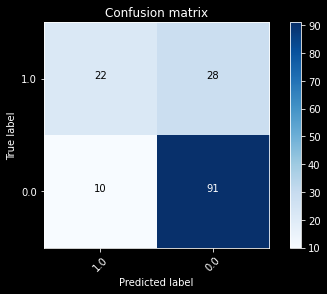

In [56]:
# Confusion matrix
class_names=[1.0,0.0]
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
#cnf_matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [57]:
test.groupby('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|  101|
|  1.0|   50|
+-----+-----+



In [58]:
# Accuracy
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())
print("Accuracy : ",accuracy)

Accuracy :  0.7483443708609272


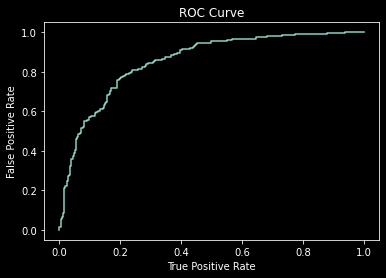

Training set areaUnderROC: 0.853567404750406


In [59]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [60]:
# Model evaluation
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7916831683168316


In [61]:
# cross-validation and parameter-tuning
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])# regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])# Elastic Net Parameter (Ridge = 0)
             .addGrid(lr.maxIter, [1, 5, 10])#Number of iterations
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, 
                    evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train)

In [62]:
## Evaluate Best Model
predictions = cvModel.transform(test)
print('Best Model Test Area Under ROC', evaluator.evaluate(predictions))

Best Model Test Area Under ROC 0.7964356435643565


In [63]:
# Best model feature weights
cvModel.bestModel

LogisticRegressionModel: uid=LogisticRegression_31ac653bab0c, numClasses=2, numFeatures=10

In [64]:
weights = cvModel.bestModel.coefficients
weights = [(float(w),) for w in weights]
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
weightsDF.toPandas().head(10)

,Feature Weight
0,-0.327278
1,0.000000
2,0.229943
3,0.187943
4,0.943144
5,-0.171500
6,-0.000551
7,-0.011712
8,0.551487
9,0.248967


In [66]:
# Best model parameters
best_model=cvModel.bestModel
print("Best model Param (RegParam): ", best_model._java_obj.getRegParam())
print("Best model Param (MaxIter): ", best_model._java_obj.getMaxIter())
print("Best model Param (ElasticNetParam): ", best_model._java_obj.getElasticNetParam())

Best model Param (RegParam):  0.01
Best model Param (MaxIter):  5
Best model Param (ElasticNetParam):  1.0


In [67]:
best_model.explainParams().split("\n")

['aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)',
 'elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 1.0)',
 'family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)',
 'featuresCol: features column name. (default: features, current: features)',
 'fitIntercept: whether to fit an intercept term. (default: True)',
 'labelCol: label column name. (default: label, current: label)',
 'lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)',
 'lowerBoundsOnIntercepts: The lower bounds on intercepts if fitti